<a href="https://colab.research.google.com/github/suhas-3190/mini-project/blob/main/miniprojectfinalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 1: Setup and Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch, coherence
from sklearn.decomposition import PCA # PCA and KMeans clustering "Principal Component Analysis"
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import entropy
from sklearn.cluster import KMeans


# Function to calculate band power using Welch's method "Power Spectral Density and forier transformation"
def calculate_band_power(data, fs, band, window_sec=2):
    if len(data) < window_sec * fs:
        nperseg = len(data)  # Use the full length if smaller than window size
    else:
        nperseg = window_sec * fs
    freqs, psd = welch(data, fs, nperseg=nperseg)
    band_freqs = (freqs >= band[0]) & (freqs <= band[1])
    return np.sum(psd[band_freqs])

# Function to calculate entropy of an EEG signal
def calculate_signal_entropy(data):
    return entropy(data)

# Function to calculate coherence between two EEG channels
def calculate_channel_coherence(channel1, channel2, fs):
    freqs, coh = coherence(channel1, channel2, fs)
    return np.mean(coh)


Part 2: Feature Extraction

In [ ]:
# Function to extract features from EEG data
def extract_features(student_data, fs, bands):
    band_power = []
    entropy_values = []
    coherence_values = []

    for channel in range(student_data.shape[1]):
        # Calculate band power for all bands
        channel_band_power = {
            band_name: calculate_band_power(student_data.iloc[:, channel], fs, band_range)
            for band_name, band_range in bands.items()
        }
        band_power.append(channel_band_power)

        # Calculate entropy for the channel
        entropy_values.append(calculate_signal_entropy(student_data.iloc[:, channel]))

        # Calculate coherence with the first channel as a reference
        if channel > 0:
            channel_coherence = calculate_channel_coherence(student_data.iloc[:, 0], student_data.iloc[:, channel], fs)
            coherence_values.append(channel_coherence)

    return band_power, entropy_values, coherence_values


Part 3: Loading Training and Testing Data

In [ ]:
# Load EEG data for training (10 students in CSV format)
train_students_data = []
for i in range(0, 10):
    train_students_data.append(pd.read_csv(f"/content/drive/MyDrive/manohar-20240624T052329Z-001/manohar/manohar_0{i + 1}.csv", header=None))

# Load EEG data for testing (2 students in CSV format)
test_students_data = []
# Assuming the 3 students are 11, 12, and 13 for the test data (adjust according to your data)
test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/mohan/20240408131214_mohan a2 t1.csv", header=None))
test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/manohar-20240624T052329Z-001/manohar/20240408124118_manohor a2 t1.csv", header=None))
test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/Rahul-20240624T052333Z-001/Rahul/20240408120942_rahul a2 t1.csv", header=None))


# test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/Rahul-20240624T052333Z-001/Rahul/20240408120942_rahul a2 t1.csv", header=None))
# test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/manohar-20240624T052329Z-001/manohar/20240408124118_manohor a2 t1.csv", header=None))
# test_students_data.append(pd.read_csv("/content/drive/MyDrive/miniproject/mohan/20240408131214_mohan a2 t1.csv", header=None))


fs = 500  # Sampling frequency (Hz)

bands = {
    "delta": (1, 4),
    "theta": (4, 8),
    "alpha": (8, 13),
    "beta": (13, 30),
    "gamma": (30, 100),
}


Part 4: Extracting Training Features

In [ ]:
# Extract features for each training student
train_band_power = []
train_entropy_values = []
train_coherence_values = []

for student_data in train_students_data:
    band_power, entropy_values, coherence_values = extract_features(student_data, fs, bands)
    train_band_power.append(band_power)
    train_entropy_values.append(entropy_values)
    train_coherence_values.append(coherence_values)


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


In [ ]:
print(train_coherence_values)

[[0.379691557347879, 0.14521364917677562, 0.1259673120292515, 0.12147795193465967, 0.35821565331533817, 0.3612810191194617, 0.47167611078060645, 0.02208825263763603, nan], [0.804232319984175, 0.39372407526317676, 0.3140576029751131, 0.12409284910549194, 0.670377704059781, 0.6007246941733159, 0.7164464388020849, 0.008880149489952248, nan], [0.9034962388084126, 0.21521468777461586, 0.0704419254424101, 0.6973763468945312, 0.9701370210011852, 0.6645465429316293, 0.7664451678733272, 0.00560073706856558, nan], [0.7801693501954873, 0.34115289772043256, 0.2550254344663546, 0.13238331483161744, 0.8687209789205761, 0.5750174968279478, 0.6975774893344653, 0.00691472244799461, nan], [0.7200761414425579, 0.1660203529601937, 0.18446158323532788, 0.15035641237278233, 0.7526619013432363, 0.5244995892668946, 0.6129737017303383, 0.008486949062971887, nan], [0.7379431180605809, 0.13634280258614145, 0.2021228316591302, 0.22493333333019733, 0.8705641830607163, 0.47964383159013874, 0.582749305160353, 0.0053

Part 5: Preparing Training Data for Model

In [ ]:
# Prepare features and targets for training
features = []
targets = []

for student_band_power in train_band_power:
    for channel_band_power in student_band_power:
        target_band = max(channel_band_power, key=channel_band_power.get)
        features.append(list(channel_band_power.values()))
        targets.append(target_band)

features_df = pd.DataFrame(features, columns=list(bands.keys()))
features_df['target'] = targets

scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_df[list(bands.keys())])

X_train, X_test, y_train, y_test = train_test_split(
    normalized_features, features_df['target'], test_size=0.2, random_state=42
)



In [ ]:
print(y_train)

55    delta
88    alpha
26    delta
42    delta
69    delta
      ...  
60    delta
71    delta
14    delta
92    delta
51    delta
Name: target, Length: 80, dtype: object


Part 6: Training the SVM Model

In [ ]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train, y_train)

cross_val_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", np.mean(cross_val_scores))


Cross-Validation Scores: [0.875  0.8125 0.8125 0.6875 0.75  ]
Average Cross-Validation Score: 0.7875


Part 7: Evaluating the SVM Model

Classification Report:
              precision    recall  f1-score   support

       alpha       0.00      0.00      0.00         1
       delta       0.84      1.00      0.91        16
       gamma       1.00      0.33      0.50         3

    accuracy                           0.85        20
   macro avg       0.61      0.44      0.47        20
weighted avg       0.82      0.85      0.81        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


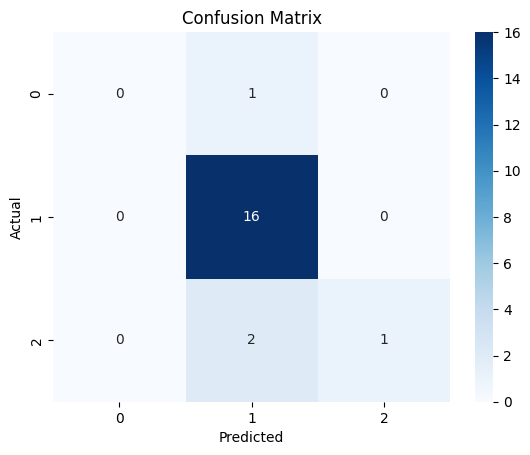

In [ ]:
y_pred = svm_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Part 8: PCA and KMeans Clustering

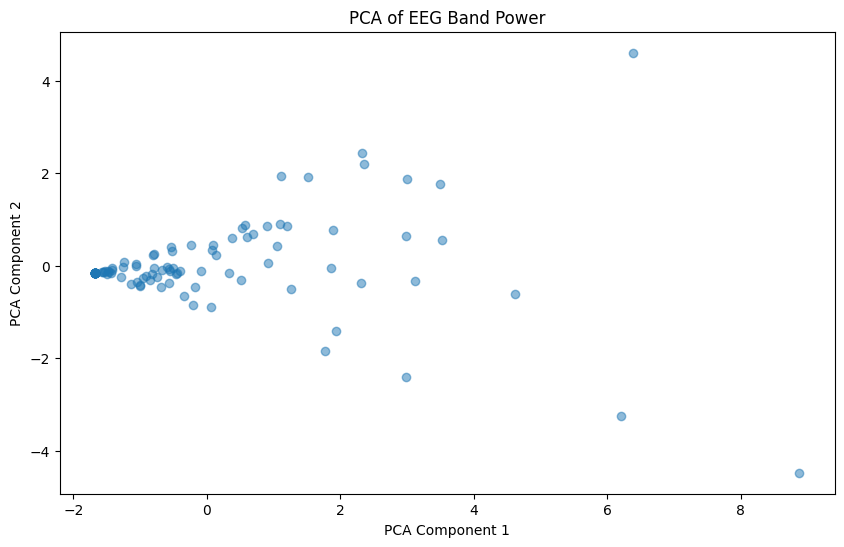

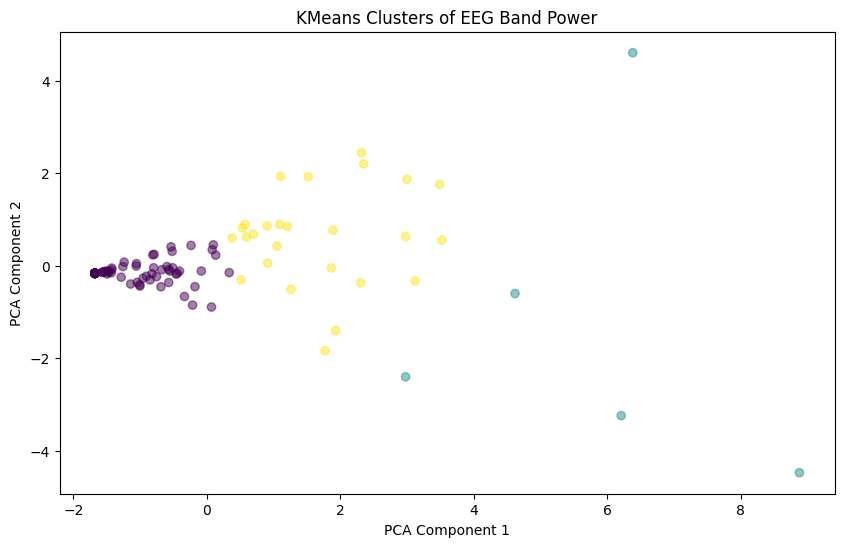

In [ ]:
# PCA and KMeans clustering " Principal Component Analysis"
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA of EEG Band Power")
plt.show()

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(pca_result)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap="viridis", alpha=0.5)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters of EEG Band Power")
plt.show()


Part 9: Visualizing Band Power for Each Student

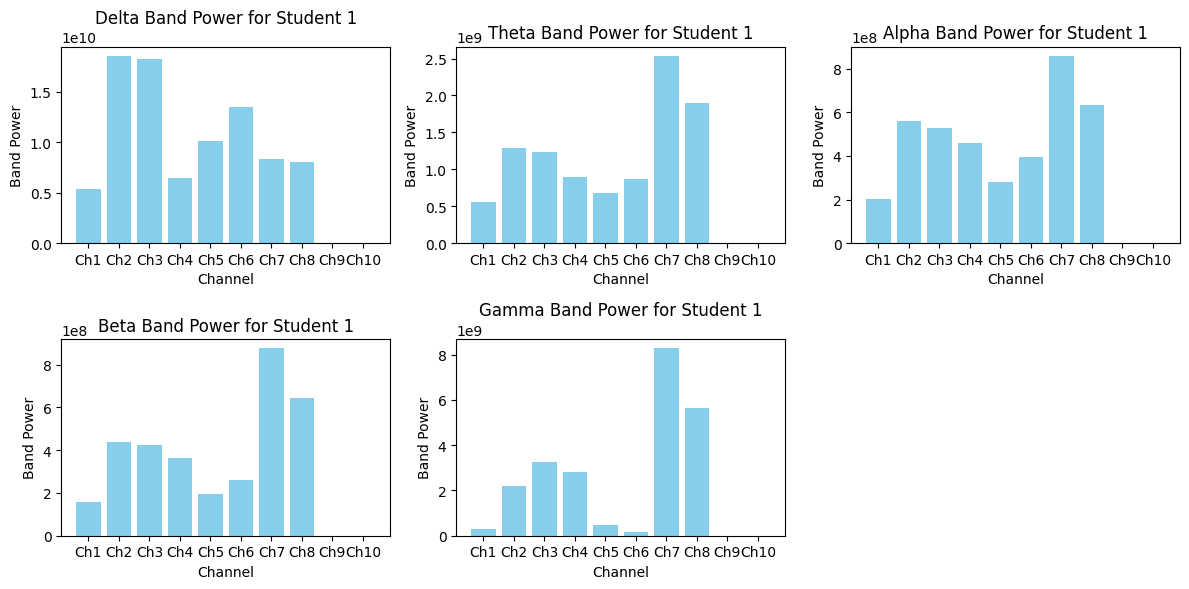

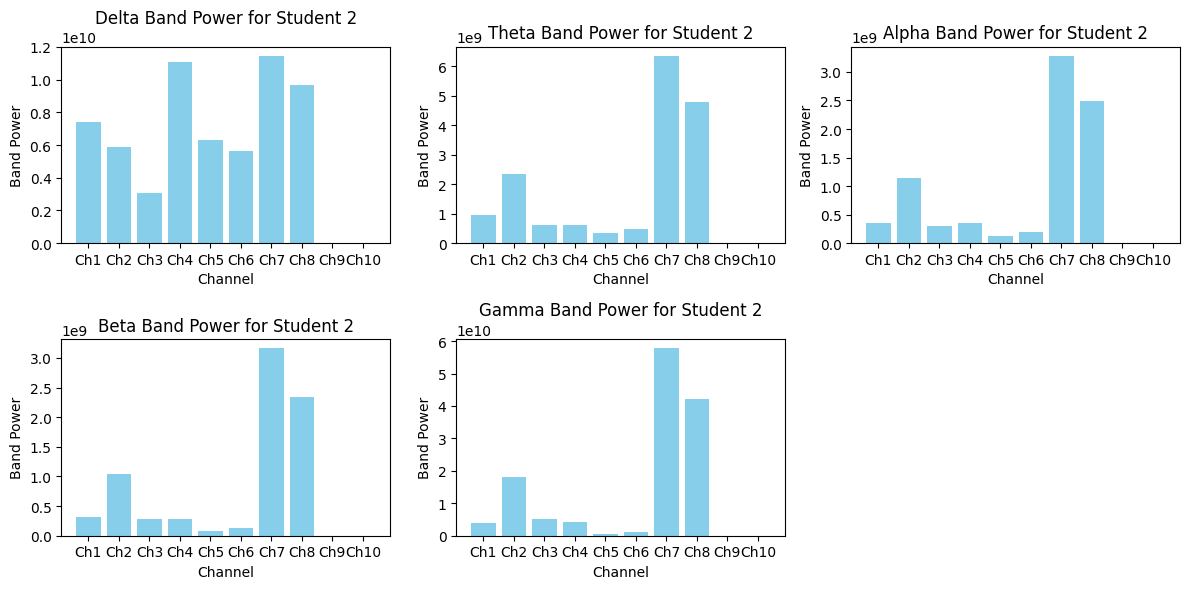

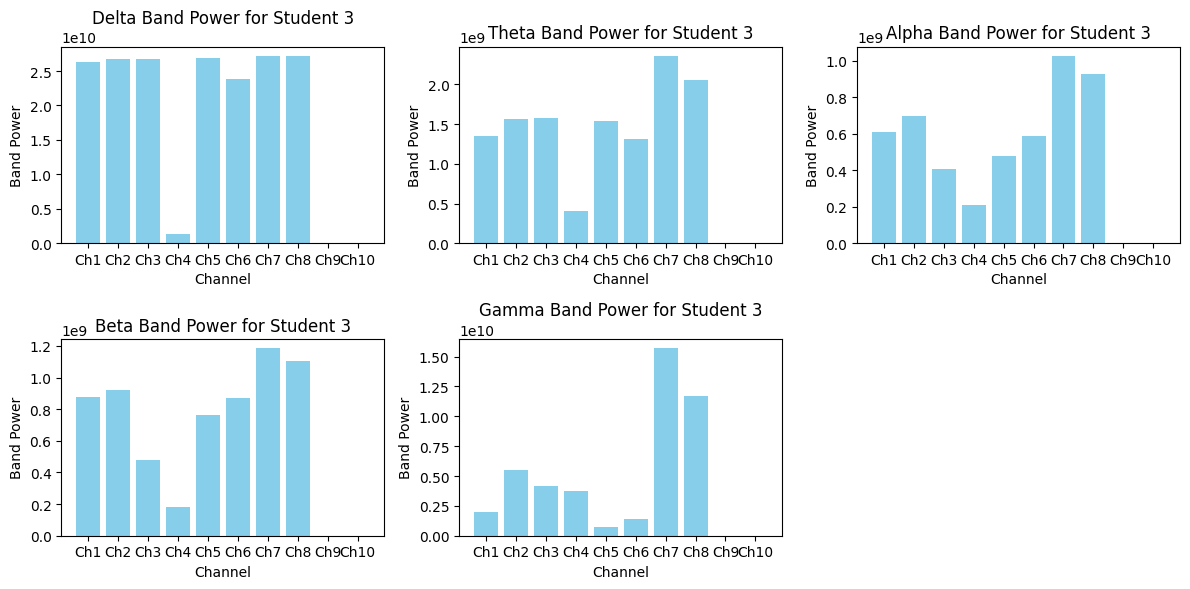

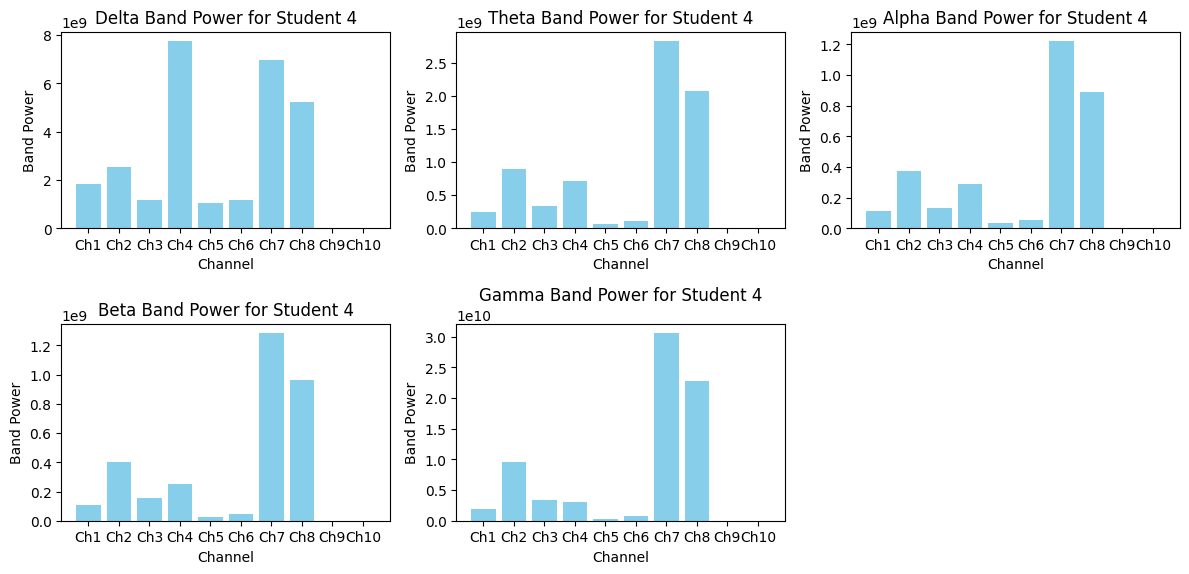

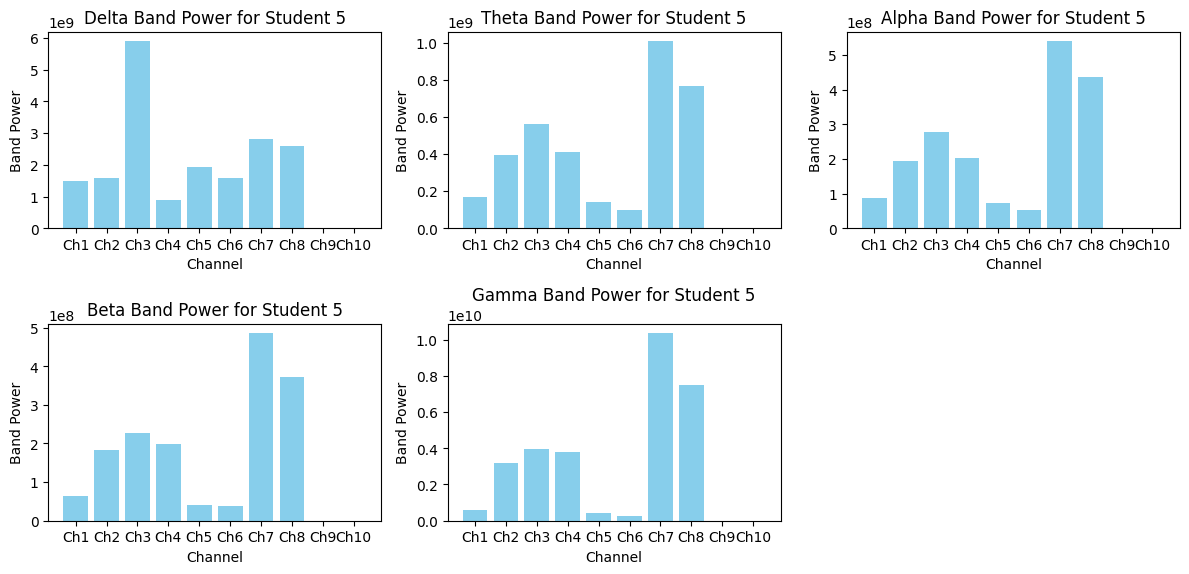

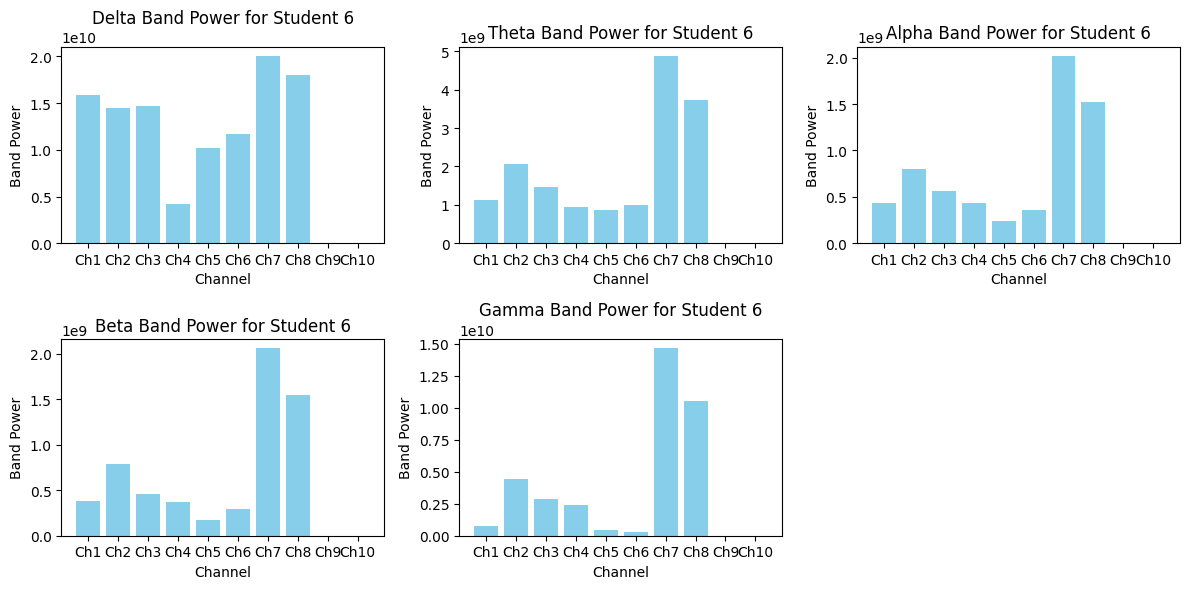

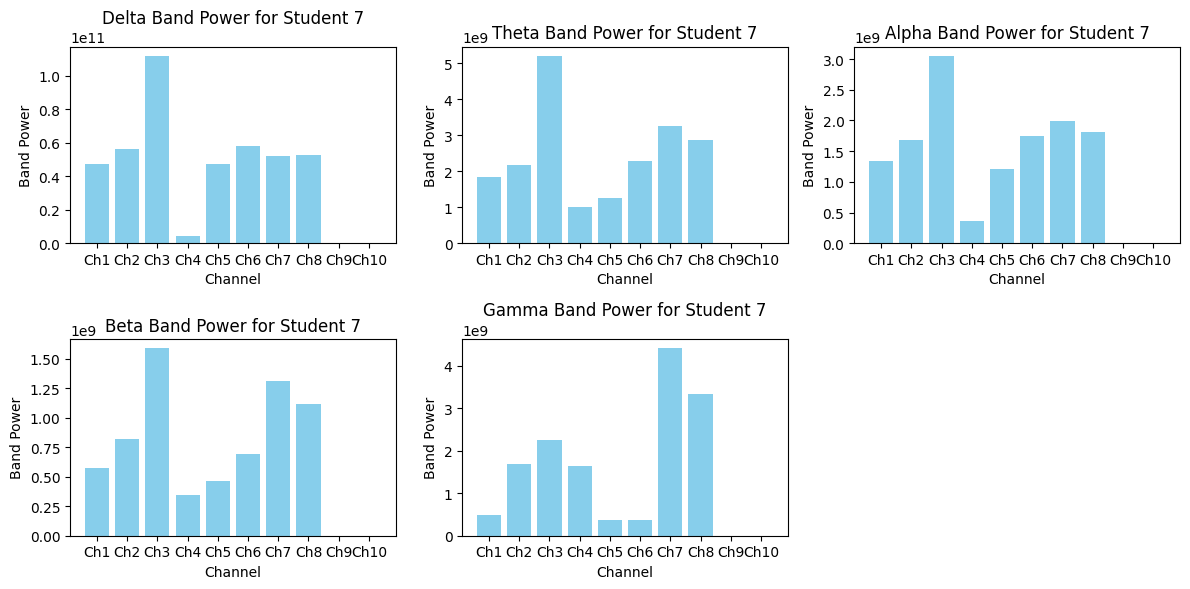

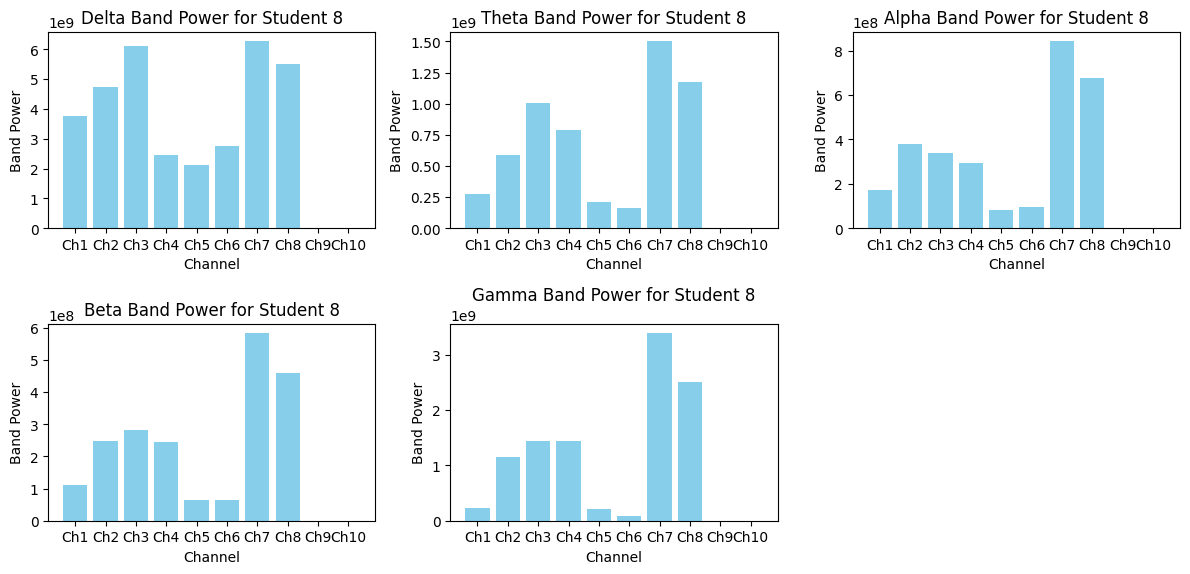

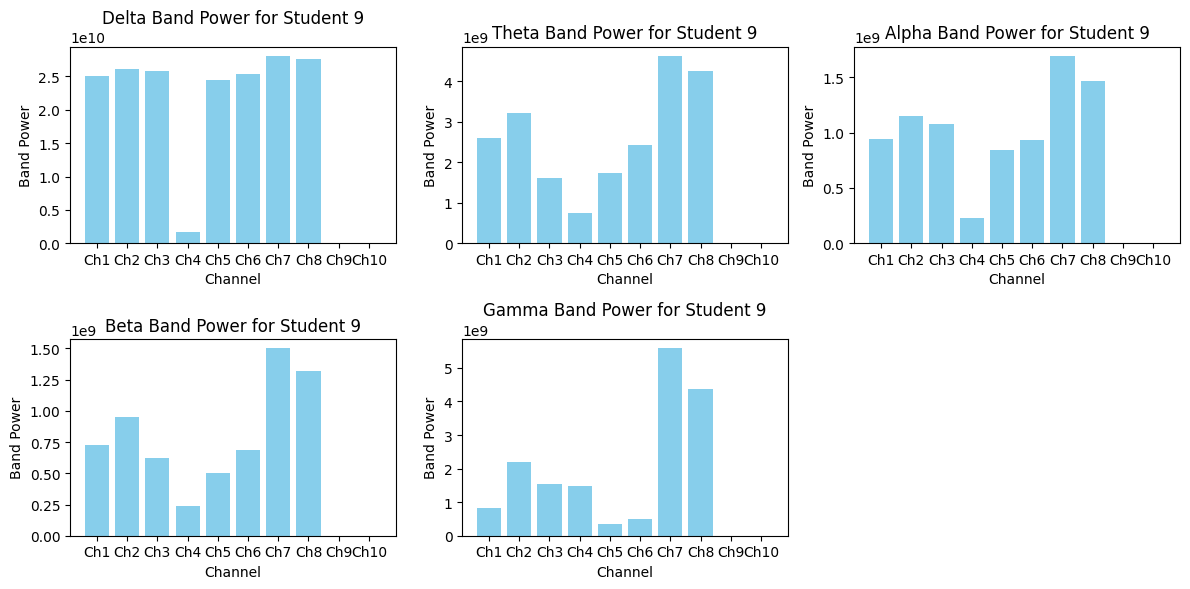

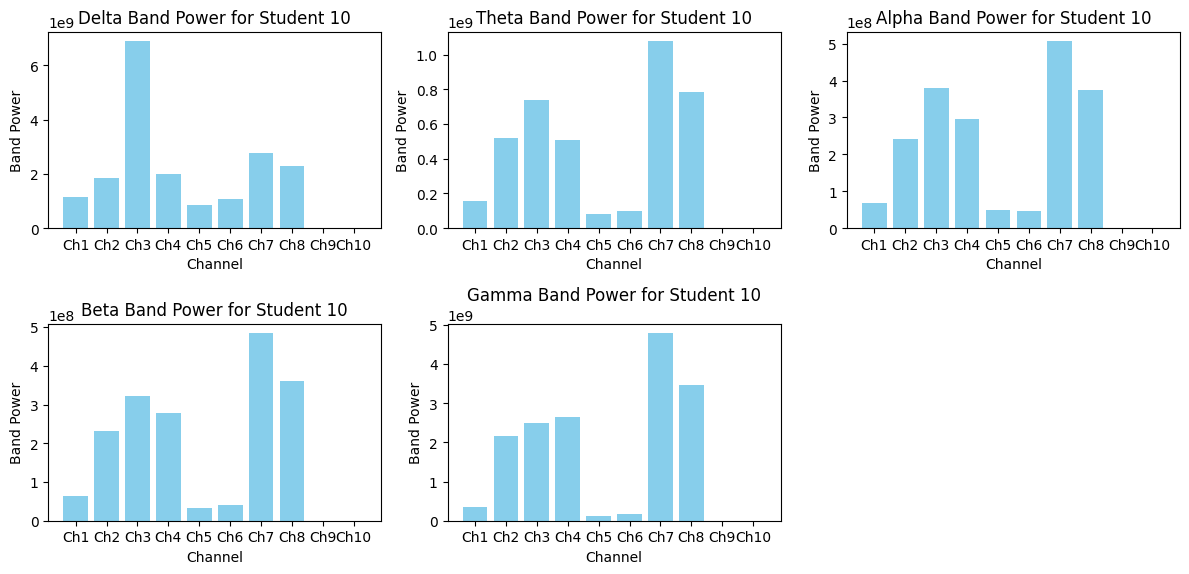

In [ ]:
# Visualize band power for each student
for i, student in enumerate(train_band_power):
    plt.figure(figsize=(12, 6))
    for j, (band_name, _) in enumerate(bands.items()):
        band_power_values = [channel[band_name] for channel in student]
        plt.subplot(2, 3, j + 1)
        plt.bar(range(len(band_power_values)), band_power_values, color='skyblue')
        plt.title(f"{band_name.capitalize()} Band Power for Student {i + 1}")
        plt.xlabel("Channel")
        plt.ylabel("Band Power")
        plt.xticks(range(len(band_power_values)), [f"Ch{i + 1}" for i in range(len(band_power_values))])
    plt.tight_layout()
    plt.show()


Part 10: Extracting Coherence and Predicting for Test Students

Processing Test Student 1


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


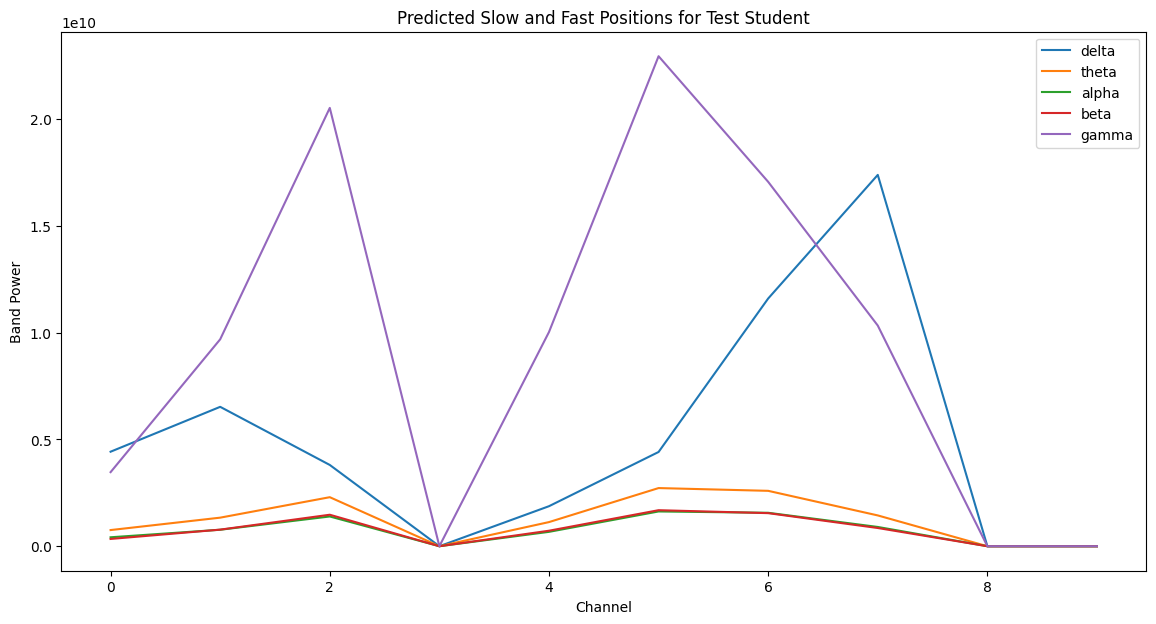

Processing Test Student 2


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


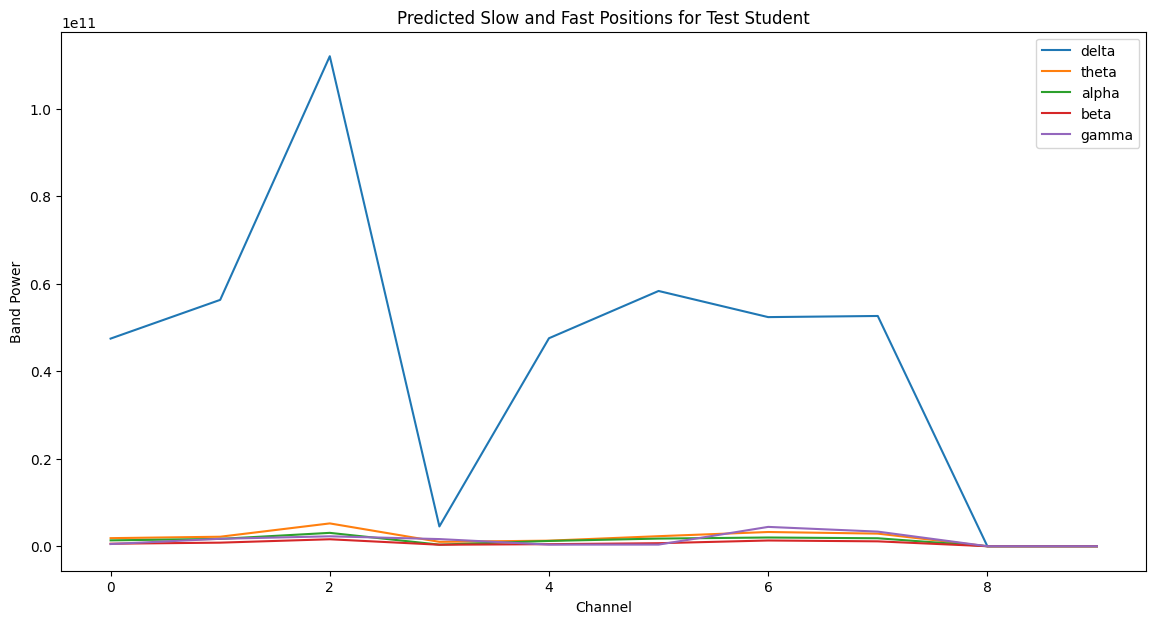

Processing Test Student 3


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


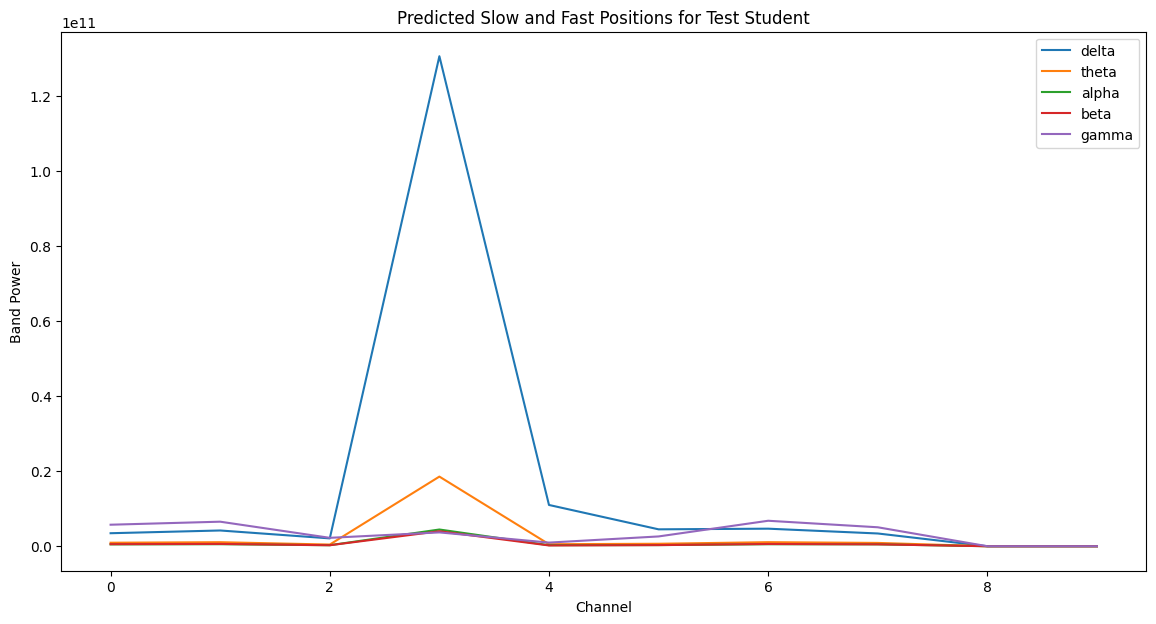

Extracting coherence for Test Student 1
Extracting coherence for Test Student 2
Extracting coherence for Test Student 3


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


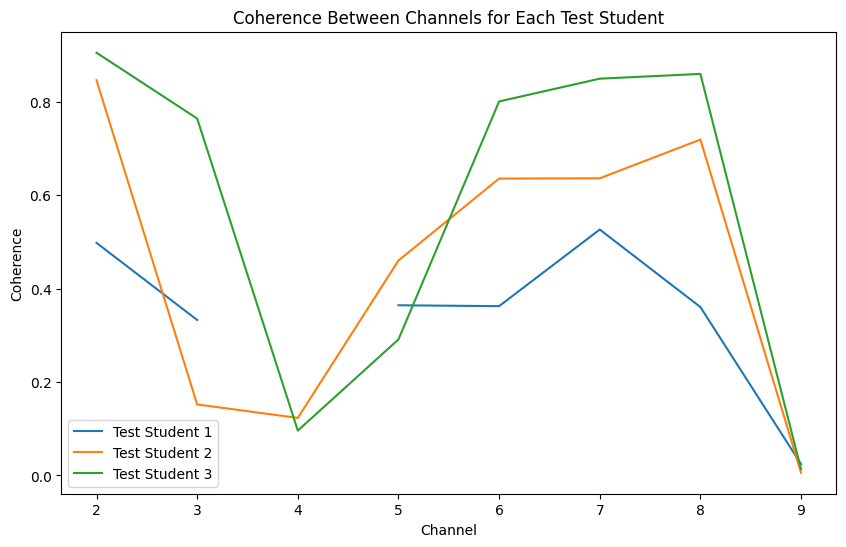

In [ ]:
# Function to prepare features for testing
def prepare_test_features(test_data, bands):
    test_band_power, test_entropy_values, test_coherence_values = extract_features(test_data, fs, bands)

    # Prepare features for testing
    test_features = [list(bp.values()) for bp in test_band_power]
    test_features_df = pd.DataFrame(test_features, columns=list(bands.keys()))

    return test_features_df

# Function to predict slow and fast positions and visualize
def predict_and_visualize(test_data, scaler, svm_model, bands):
    try:
        test_features_df = prepare_test_features(test_data, bands)

        # Predict slow and fast positions
        test_predictions = svm_model.predict(scaler.transform(test_features_df))
        test_features_df['prediction'] = test_predictions

        # Map predicted labels to numeric values for plotting
        label_map = {label: i for i, label in enumerate(np.unique(test_features_df['prediction']))}
        test_features_df['prediction_numeric'] = test_features_df['prediction'].map(label_map)

        # Plotting slow and fast positions
        plt.figure(figsize=(14, 7))
        for i, band in enumerate(bands.keys()):
            plt.plot(test_features_df.index, test_features_df[band], label=band)
        plt.xlabel('Channel')
        plt.ylabel('Band Power')
        plt.title('Predicted Slow and Fast Positions for Test Student')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in predicting and visualizing: {e}")

# Predict and visualize slow and fast positions for test students
for i, test_data in enumerate(test_students_data):
    print(f"Processing Test Student {i + 1}")
    predict_and_visualize(test_data, scaler, svm_model, bands)

# Function to extract coherence between channels for each student
def extract_coherence(test_data, fs):
    coherence_values = []
    for channel in range(1, test_data.shape[1]):
        channel_coherence = calculate_channel_coherence(test_data.iloc[:, 0], test_data.iloc[:, channel], fs)
        coherence_values.append(channel_coherence)
    return coherence_values

# Extract coherence for each test student
test_coherence_values = []
for i, test_data in enumerate(test_students_data):
    print(f"Extracting coherence for Test Student {i + 1}")
    try:
        coherence_values = extract_coherence(test_data, fs)
        test_coherence_values.append(coherence_values)
    except Exception as e:
        print(f"Error in extracting coherence for Test Student {i + 1}: {e}")

# Plot coherence between channels for each test student
plt.figure(figsize=(10, 6))
for i, coherence_val in enumerate(test_coherence_values):
    plt.plot(range(2, len(coherence_val) + 2), coherence_val, label=f"Test Student {i + 1}")
plt.xlabel("Channel")
plt.ylabel("Coherence")
plt.title("Coherence Between Channels for Each Test Student")
plt.legend()
plt.show()


Processing Test Student 1


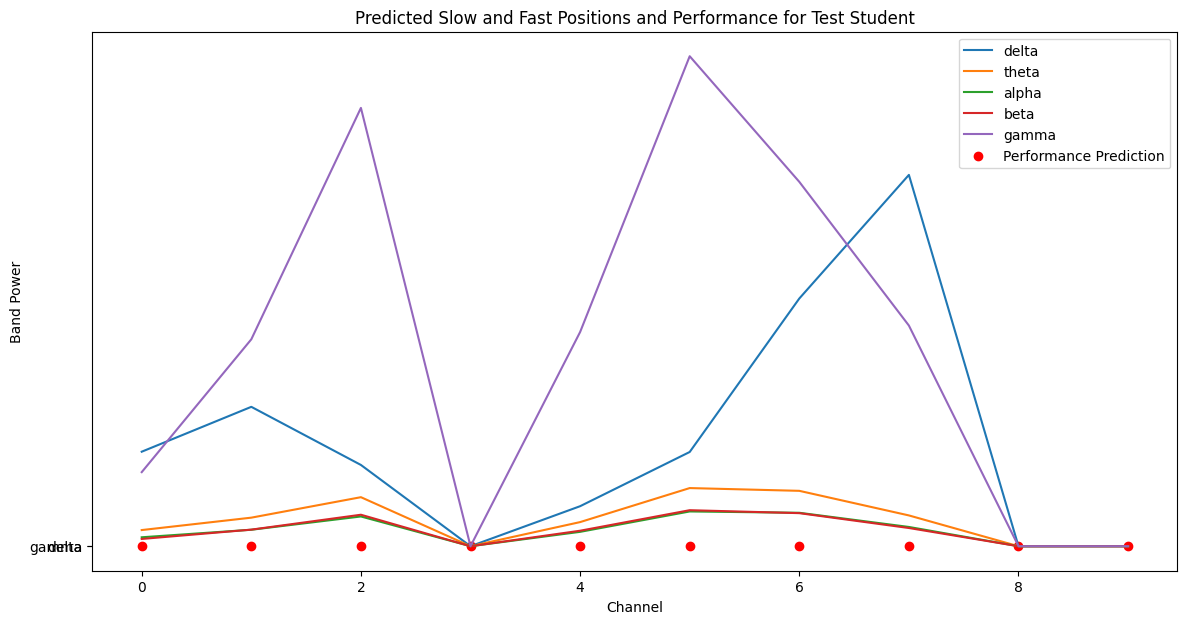

Processing Test Student 2


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


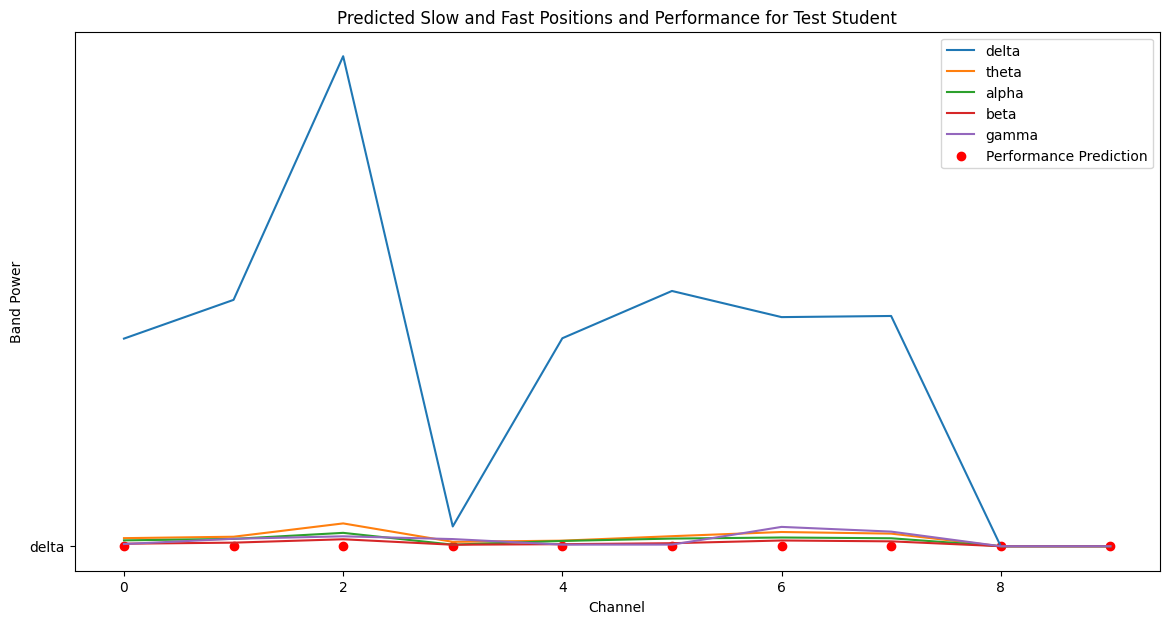

Processing Test Student 3


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


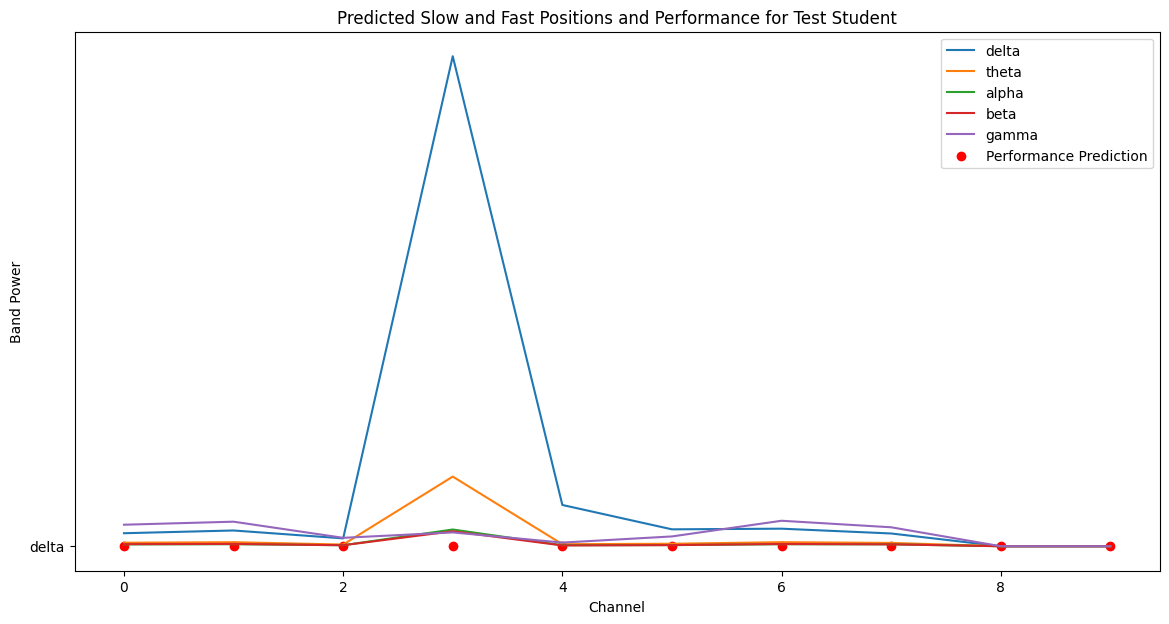

In [ ]:
# Function to predict slow and fast positions and visualize
def predict_and_visualize(test_data, scaler, svm_model, bands):
    try:
        # Prepare test features
        test_features_df = prepare_test_features(test_data, bands)

        # Predict slow and fast positions
        test_predictions = svm_model.predict(scaler.transform(test_features_df))
        test_features_df['prediction'] = test_predictions

        # Map predicted labels to numeric values for plotting
        label_map = {label: i for i, label in enumerate(np.unique(test_features_df['prediction']))}
        test_features_df['prediction_numeric'] = test_features_df['prediction'].map(label_map)

        # Determine the band with the highest power for each student
        test_features_df['highest_band'] = test_features_df[list(bands.keys())].idxmax(axis=1)

        # Predict performance based on highest band (This might not be correct as you are predicting again with the same model)
        performance_prediction = svm_model.predict(scaler.transform(test_features_df[list(bands.keys())]))

        # Plotting slow and fast positions and band power prediction
        plt.figure(figsize=(14, 7))

        for i, band in enumerate(bands.keys()):
            plt.plot(test_features_df.index, test_features_df[band], label=band)

        # Plot performance prediction
        plt.scatter(test_features_df.index, performance_prediction, color='red', label='Performance Prediction')

        plt.xlabel('Channel')
        plt.ylabel('Band Power')
        plt.title('Predicted Slow and Fast Positions and Performance for Test Student')
        plt.legend()
        plt.show()

    except Exception as e:
        print(f"Error in predict_and_visualize: {e}")

# Predict and visualize slow and fast positions and performance for test students
for i, test_data in enumerate(test_students_data):
    print(f"Processing Test Student {i + 1}")
    predict_and_visualize(test_data, scaler, svm_model, bands)


Processing Test Student 1


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


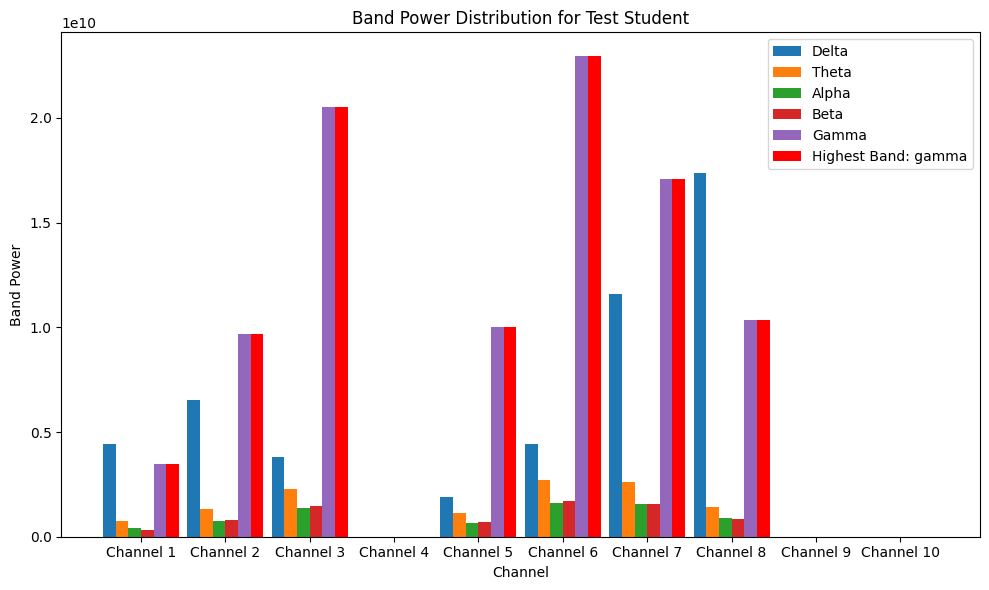

Processing Test Student 2


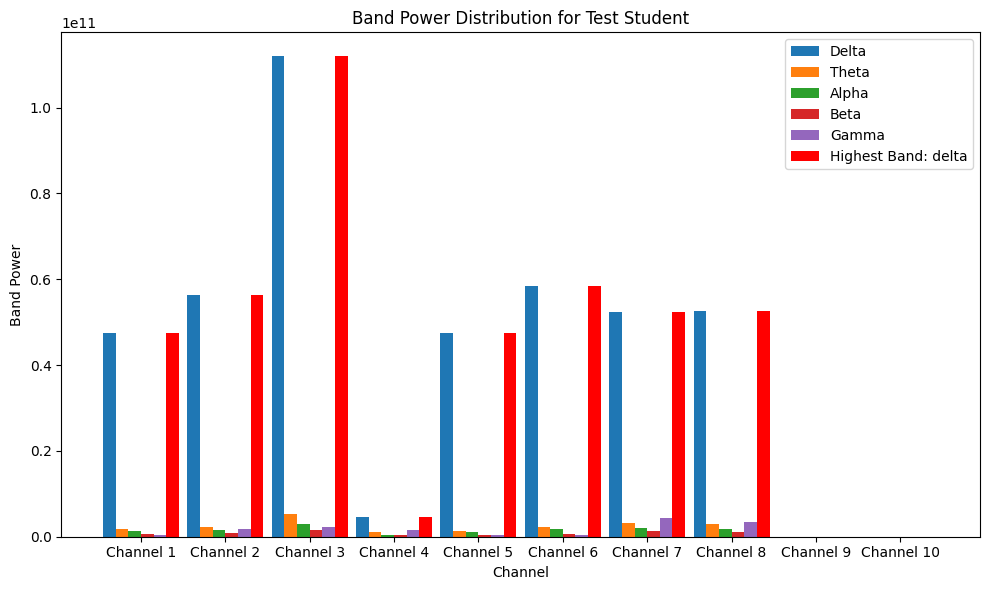

Processing Test Student 3


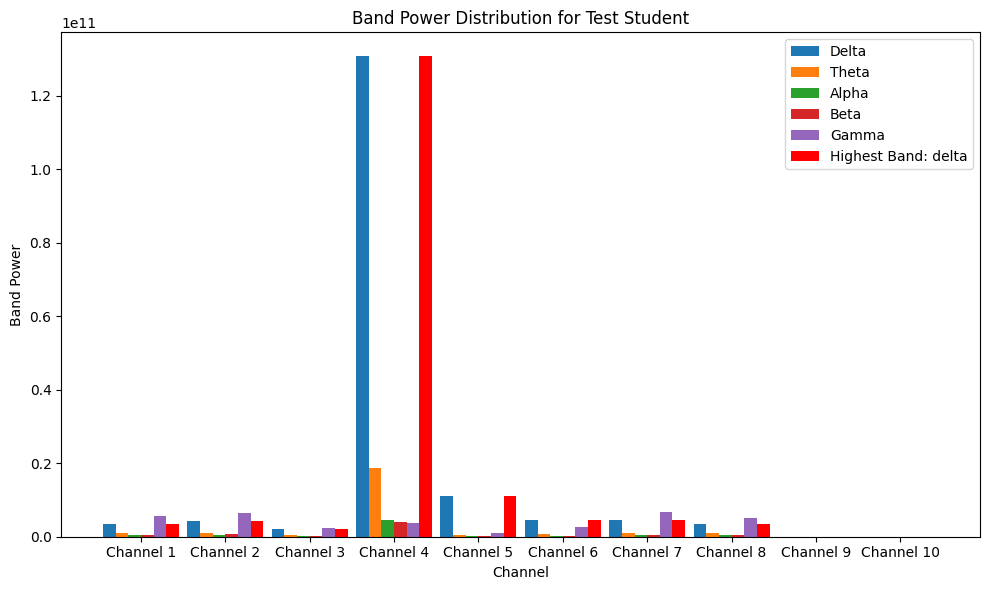

In [ ]:
# Function to predict slow and fast positions and visualize
def predict_and_visualize(test_data, bands):
    try:
        # Prepare test features
        test_band_power, _, _ = extract_features(test_data, fs, bands)

        # Determine the band with the highest power for this student
        highest_band = max(bands, key=lambda band: np.mean([channel[band] for channel in test_band_power]))

        # Plotting the band powers in a bar graph
        plt.figure(figsize=(10, 6))
        channel_indices = np.arange(len(test_band_power))
        bar_width = 0.15

        for i, (band_name, band_range) in enumerate(bands.items()):
            band_power_values = [channel[band_name] for channel in test_band_power]
            plt.bar(channel_indices + i * bar_width, band_power_values, bar_width, label=f'{band_name.capitalize()}')

        # Highlight the band with the highest power
        plt.bar(channel_indices + len(bands) * bar_width, [channel[highest_band] for channel in test_band_power],
                bar_width, color='red', label=f'Highest Band: {highest_band}')

        plt.xlabel('Channel')
        plt.ylabel('Band Power')
        plt.title('Band Power Distribution for Test Student')
        plt.xticks(channel_indices + len(bands) * bar_width / 2, [f'Channel {i+1}' for i in range(len(test_band_power))])
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error in predict_and_visualize: {e}")

# Predict and visualize band powers for test students
for i, test_data in enumerate(test_students_data):
    print(f"Processing Test Student {i + 1}")
    predict_and_visualize(test_data, bands)
